# Diabetes Prediction 

## Main Goals

- Scale the data
- Apply basic feature selection
    - Correlation
    - Variance threshold
- Build a model to predict if a person has diabetes

### Context

Diabetes is a widespread and serious health condition that affects millions of people around the world, leading to significant medical, social, and economic challenges. Early detection and intervention are crucial for improving outcomes and quality of life for those at risk. In the field of data science, predictive modeling offers a valuable tool for identifying individuals who may be at higher risk of developing diabetes based on key health measurements.

For this project, we will use the Pima Indians Diabetes Dataset, a well-known collection of medical records from adult female patients of Pima Indian heritage. This dataset provides essential features such as glucose levels, BMI, age, and more, making it an excellent resource for exploring feature engineering techniques like scaling and feature selection. While this dataset is limited to a specific demographic and would need to be expanded for broader, real-world application, it serves as a practical and instructive example for learning the fundamentals of predictive modeling in healthcare.

## 1. Data Loading

We'll be using the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) for our project. In accordance with Kaggle licenses, please directly visit the Kaggle website and download the `diabetes.csv` dataset for this activity.

We can start by loading in the dataset into a pandas dataframe, and then displaying it to ensure it loaded correctly, and so we can see what the features are and how the target is displayed.

It's worth mentioning that anytime you have a dataset from an external source, such as Kaggle, you can and should refer back to the source of the data to clear up misconceptions and also to get a better understanding of the data.

In [1]:
#Import pandas so we can read the CSV file
import pandas as pd

#Read the CSV file
df = pd.read_csv("diabetes.csv")

#Display the first few rows of the dataset
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data Analysis

Displaying the data like this allows to see some important infromation, as well as ensuring we can properly load the data. Here, we can see the dataset and it's features. Let's take note of each column, and supplement our lack of understanding with the descriptions from the website

- Pregnancies: As the dataset consists entirely of adult females, many of them have gone through some amount of pregnancies. This could possibly have an impact on whether they have diabetes
- Glucose: Plasma glucose concentration from 2 hours in an oral glucose tolerance test. 
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)$^2$)
- DiabetesPedigreeFunction: How likely a patient is to have diabetes based on their family history. Higher values means a stronger genetic link to diabetes.
- Age: In years
- Outcome: A binary features that represents whether these people have diabetes or not. This will be our target for the project. 

While we will be building our predictive model much later, knowing that our target is a binary feature should clue us that it might be ideal to use a logistic regression model for this project, as it is well suited for predicting binary features, especially with numerical datasets.


## 2. Preprocessing

Having viewed and understood the features our data, it's now time to see if our data needs to be cleaned up. Before we split the data or build the model, it is important to make sure the data is ready for the model and any other transformations.

Let's start by using functions from pandas to check if there are any null entries in the data set. Having missing entries can cause errors in predictive models while training so it's important to ensure that null entries are dealt with before proceding. Unless a dataset explicitly says there are no null values, this should always be checked

In [2]:
#Check for missing values
display(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Thankfully our work is cut short for us as the dataset is completely filled out. As such, there is no need to handle missing data, and we can move on to the next step of preprocessing for this project.

### Feature Selection
To make our model as effective as possible, we’ll apply feature selection techniques before training. By examining the correlation between each feature and the target outcome, we can identify which health measurements are most relevant to predicting diabetes, allowing us to focus on the signals that matter most. 

Additionally, we’ll use a variance threshold to remove features that show little to no variation, since features that rarely change are unlikely to help the model distinguish between patients with and without diabetes. These steps help us streamline the dataset, reduce noise, and set a strong foundation for our predictive modeling. 

#### Correlation

We'll start by inspecting the correlation between each of the features and the target, which is our Outcome column. We can do this using the .corr() method in pandas. We'll also import numpy here for the absolute value function. .corr() returns the correlation, and whether it is positive or negative too. For our sake, they'll be displayed in the order of strongest correlations, so the absoulute value function will help.

We can take this a step further and remove any features that have a significantly low correlation as well, as they likely won't assist us in our predictions.

In [3]:
#Import numpy 
import numpy as np

#Calculate the correlation between each feature and the target
correlation = df.corr()['Outcome'].abs().sort_values(ascending=False)

#Display the correlation values
display(correlation)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Now that we can see our correlations with the Outcome target, we know that Glucose has the highest correlation to diabetes, followed by BMI. You'll also notice that skin thickness and blood pressure have a very minimal correlation to our target column. As such, we can go ahead and drop these features, as they won't assist the model in predicting whether a person has diabetes.

In [ ]:
#Filtering our dataframe to only include features with a correlation greater than 0.1
#index.tolist() just makes it so that we get the names properly from our correlation series
df_filtered = df[correlation[correlation > 0.1].index.tolist()]

#Display the filtered dataframe
display(df_filtered)

,Outcome,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,1,148,33.6,50,6,0.627,0
1,0,85,26.6,31,1,0.351,0
2,1,183,23.3,32,8,0.672,0
3,0,89,28.1,21,1,0.167,94
4,1,137,43.1,33,0,2.288,168
...,...,...,...,...,...,...,...
763,0,101,32.9,63,10,0.171,180
764,0,122,36.8,27,2,0.340,0
765,0,121,26.2,30,5,0.245,112
766,1,126,30.1,47,1,0.349,0


With this, we have removed the skin thickness and blood pressure columns. This will help our model to predict whether a person has diabetes or not with less distractions.

#### Variance

We can take our filtering a step further and check for features with low variance. This means that the values are not changing enough for a predictive model to derive meaningful information from certain features. Using the VarianceThreshold module from Sklearn, we can continue with our feature selection, as it not only checks for variance, but removes features below a certain threshold. Before we use the module, we will separate the target from the current dataframe. Since the function removes the features below our selected threshold for us, there is a chance that it will simply remove our target. 

As such, we will first seperate our targets and features, and then apply the VarianceThreshold function.

In [ ]:
#Import variance threshold from sklearn
from sklearn.feature_selection import VarianceThreshold

#Split the data into features and target
X = df_filtered.drop('Outcome', axis=1)
y = df_filtered['Outcome']

#Create the VarianceThreshold object. Any feature with less than a 0.01 variance will be removed
selector = VarianceThreshold(threshold=0.01)

#Fit the object to the data
selector.fit(X)

#Transform the data
X_var = selector.transform(X)

#Create a DataFrame with the selected features
X_filtered = pd.DataFrame(X_var, columns=X.columns[selector.get_support()])

#Inspect the features that were kept
display(X_filtered)

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,148.0,33.6,50.0,6.0,0.627,0.0
1,85.0,26.6,31.0,1.0,0.351,0.0
2,183.0,23.3,32.0,8.0,0.672,0.0
3,89.0,28.1,21.0,1.0,0.167,94.0
4,137.0,43.1,33.0,0.0,2.288,168.0
...,...,...,...,...,...,...
763,101.0,32.9,63.0,10.0,0.171,180.0
764,122.0,36.8,27.0,2.0,0.340,0.0
765,121.0,26.2,30.0,5.0,0.245,112.0
766,126.0,30.1,47.0,1.0,0.349,0.0


In this case, we actually encounter a situation where none of the features had a variance lower than the variance threshold, and none of the features were removed by the VarianceThreshold function. This, alongside inspecting the data, tells us that there is actually already plenty of variance in the features of the dataset. We could raise the threshold a little, but for a relatively small dataset such as this one, it could potentially be harmful to the model to do so, as every piece of relevant information matters. 

As such, we'll leave the dataset like this. We're also now ready to move on from preprocessing.


## 3. Graphing
While not always necessary, it does help to graph out features and see the relationships between the features and the target firsthand. If not for the model's understanding, then for our own. Understanding the data is always crucial as a data scientist. Here we'll use the matplotlib and seaborn libraries to graph out some relationships. 

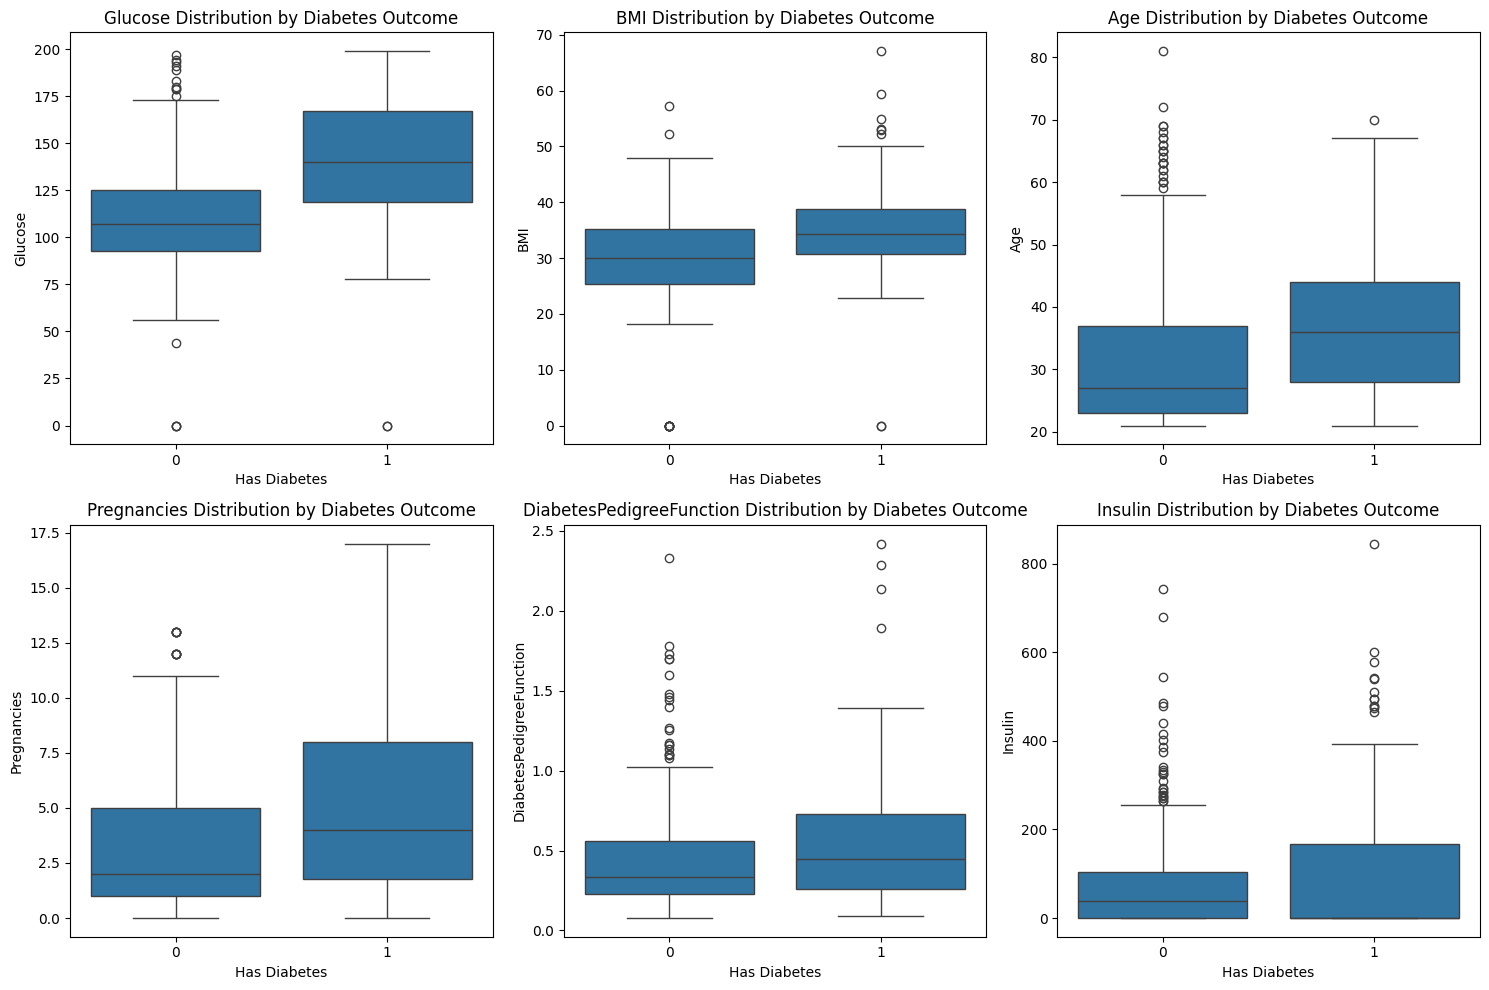

In [ ]:
#Import libraries for visualization
#Not always necessary, but %pip install ensures that seaborn and matplotlib are installed. 
#Only needs to run once, and only if you don't have them installed already.
#%pip install seaborn 
#%pip install matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size for better visibility
plt.figure(figsize=(15, 10))

#Create subplots for each feature. We can do this with a loop!
for i, feature in enumerate(X_filtered.columns, 1):
    plt.subplot(2, 3, i)
    
    #Create boxplots showing distribution of each feature based on outcome
    sns.boxplot(x=y, y=X_filtered[feature])
    plt.title(f'{feature} Distribution by Diabetes Outcome')
    plt.xlabel('Has Diabetes')
    plt.ylabel(feature)

#Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Here we can see some key trends in the health measurements of the patients, based on whether or not they have diabetes:

- Glucose: Individuals with diabetes tend to have higher glucose levels overall, with a clear upward shift in their distribution compared to those without diabetes.

- BMI and Age: Both BMI and age are generally higher for patients with diabetes, suggesting that these factors are associated with greater risk.

- Pregnancies: The number of pregnancies is higher on average among those with diabetes, although there is substantial overlap between the groups.

- Diabetes Pedigree Function: This feature also trends higher in the diabetes group, indicating that a stronger family history of diabetes may be linked to a greater likelihood of having the disease.

- Insulin: Insulin values vary widely, but the distribution is noticeably shifted upward for patients with diabetes, though there are some outliers in both groups.

While there is some overlap in the distributions for each feature, these plots suggest that measurements like glucose, BMI, and age provide useful signals for distinguishing between patients with and without diabetes. This is in line with what we previously figured out through the correlations in the data. Keeping these trends in mind, we can proceed to the next step of doing the train_test split.

## 4. Train Test Split

Now that our data is preprocessed and we have a sufficient idea of the trends of or data, we can split the data into training and testing data. Specifically in a manner so that 80% of the data goes to the training set, and 20% to the testing set. We do this so that our predictive model has plenty of data to work with. This is also done so that we have some data to test the efficiency of our model with, and so that the model doesn't learn from the testing data as well.

This can be done through the train_test_split function in Sklearn. Take advantage of your libraries.

In [13]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=64)


## 5. Scaling the Data  
With our training and testing data split, we can safely make adjustments to the data without once again confusing the model and having it learn from the testing data. For example, the mean and standard deviation used for scaling would be influenced by the test data, data your model should never see during training. This is why we wait to split the data before scaling, as opposed to scaling alongside the rest of the preprocessing steps.

We also scale the data so that the model doesn't give confuse the data as being ordinal, meaning that it would presume the data is ranked in a meaningful way, when it really isn't. By normalizing these variables, typically so they have mean zero and and a standard deviation of one, we help the model interpret all features on an even playing field, which can lead to better performance, especially when using algorithms sensitive to feature scale.

We’ll use a scaler from Sklearn, fitting it on the training data and applying the same transformation to the test data, so we avoid any information leaking from test to train.

In [14]:
#Import the standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

#Create an instance of the scaler
scaler = StandardScaler()

#Fit the scaler on the training data and transform both train and validation sets
X_train_final = scaler.fit_transform(X_train)
X_test_final = scaler.transform(X_test)

With this, our values have been scaled so that there is no bias towards larger values in the dataset.

## 6. Building and Training the Model

As previously stated, our best choice of a predictive model for this dataset is the logistic regression model. Being simple, easy to interpret, and with plenty of metrics to let us know how well the model predicts, it is ideal for our data, especially since we are predicting a binary target.

First, we have to import the LogisitcRegression module from Sklearn, and then we'll "fit" or train the model on the data that we have prepared for it. Again, libraries often do heavy lifting for us, so be sure to take advantage of it.

In [16]:
#import the LogisticRegression module
from sklearn.linear_model import LogisticRegression

#Create the model. High max_iter makes sure we give it enough time to converge. 
#We'll use the same random states from our previous train_test_split.
model = LogisticRegression(max_iter=1000, random_state=64)

#Fit the model on the training data. 
model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=64)

Something important to note is the max_iter parameter when creating the model. This is just the number of times the model will update the weights to find out which features to prioritize in predicting. Having a high number, such as 1000, means it will check and update the weights 1000, but will have likely settled on an ideal weighting before iteration 1000.

With that out of the way, the model has been built, and trained.

## 7. Evaulating the Model

At this point, the model has been built and trained and on ideal weights for predicting if a person has diabetes within this ethnic group, and if they're female. The criteria is still specific, but if extensive data comes out that has these features (and more) but extending across to a much larger population, these techniques that we used today can still work.

We'll start by importing some metrics of success from Sklearn, and then see how well our model did in predicting the testing data.

In [17]:
#Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Make predictions on the validation set, and store it in a variable. 
y_pred = model.predict(X_test_final)

#Check the accuracy of our predictions
print("Validation Accuracy:", accuracy_score(y_test, y_pred))

#Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Print the classification report for more details
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.7987012987012987
Confusion Matrix:
 [[92 13]
 [18 31]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.70      0.63      0.67        49

    accuracy                           0.80       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



### Analysis

#### Confusion Matrix
The confusion matrix breaks down the model’s predictions for diabetes diagnosis. Each row represents the actual class; 0 for patients without diabetes and 1 for patients with diabetes, while each column shows the predicted class. The top-left value (92) indicates correct predictions for non-diabetic patients, while the bottom-right (31) shows correct predictions for diabetic patients. The off-diagonal values reveal where the model made mistakes: 13 non-diabetic patients were incorrectly classified as having diabetes, and 18 diabetic patients were missed by the model. Overall, the matrix shows the model is better at correctly identifying non-diabetic patients, with more errors occurring when predicting positive cases.

#### Classification Report
Precision, recall, and F1-score give us more insight into how well the model handles each class:

- Precision: For class 0 (no diabetes), precision is strong at 0.84, meaning that when the model predicts a patient does not have diabetes, it is usually correct. For class 1 (has diabetes), precision drops to 0.70, indicating some false positives, meaning that patients predicted to have diabetes who actually do not.

- Recall: The recall for class 0 is 0.88, showing the model successfully catches most non-diabetic patients. For class 1, recall is lower at 0.63, reflecting that the model misses a notable portion of actual diabetes cases.

- F1-score: The F1-scores, which balance precision and recall, are 0.86 for non-diabetic and 0.67 for diabetic patients, pointing to a stronger performance for identifying non-diabetic individuals.

The macro and weighted averages for all metrics hover around 0.75–0.80, suggesting a moderate ability to distinguish between the two groups, but with room for improvement, especially in detecting diabetic cases.

#### Classification Report Analysis
Overall Accuracy: The model achieved an accuracy of 0.80, meaning it correctly classified 80% patients in the validation set.

- Class 0 (No Diabetes): The model is more reliable for patients without diabetes, with both precision and recall above 0.80, resulting in a strong F1-score of 0.86.

- Class 1 (Has Diabetes): Precision and recall are lower for diabetic patients, indicating the model is more likely to miss true positives or incorrectly label non-diabetic patients as diabetic.

Support: The number of samples in each class is imbalanced (105 without diabetes, 49 with diabetes), which may contribute to the model’s better performance on non-diabetic patients.


Overall, this project demonstrated how basic feature selection and scaling can be used to build a predictive model for diabetes diagnosis using health measurements specifically from the Pima Indians dataset. Through visual exploration and systematic feature selection, we identified key trends in the data and streamlined the set of predictors before training our model. While our logistic regression model achieved an overall accuracy of 80%, it performed noticeably better at identifying patients without diabetes than those with the condition. This is a reminder of the challenges that come with imbalanced datasets and the importance of choosing evaluation metrics carefully. Accuracy alone would have suggested this is a wonderful model, but recall shows that we still have plenty of room to improve. However, going through with processing the data provides us with invaluable skills and understanding of concepts of how to build models for other projects.

Overall, this workflow provides a strong foundation for predictive modeling in healthcare, and highlights the practical steps and considerations needed to turn raw data into actionable insights. As always, good work for making it to the end. Congratulations!